# Reinforcement Learning _ Intro example

Let's consider a classic and simple reinforcement learning problem: the CartPole game from OpenAI's Gym library.

**Game description:** A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The goal is to keep the pole balanced upright by moving the cart left or right.

Play yourself! Here: https://jeffjar.me/cartpole.html


## Installing libraries

- Install OpenAI's gym library using `pip install gym`
- Documentation: https://gymnasium.farama.org/
- GitHub: https://github.com/openai/gym/

In [1]:
! pip freeze | grep gym

gym==0.15.3
gym-notices==0.0.8


In [2]:
# ! pip install gym==0.15.3

## Load libraries

In [25]:
import gym
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from IPython.display import display, clear_output

## Create function to visualize pole

Rendering a visual representation of the CartPole environment at a given time step. Its main purpose is to display the state of the CartPole simulation, including the cart, the pole, and relevant information, on a graphical interface for visualization and debugging.

In [26]:
def render_cartpole(ax, observation, step, action, reward, episode):
    ax.clear()

    # CartPole constants
    cart_width = 0.3
    cart_height = 0.2
    pole_width = 0.05
    pole_len = 1.0

    # Extract the observation data
    x_cart, x_dot, theta, theta_dot = observation

    # Convert pole angle to x, y coordinates
    pole_x = x_cart + pole_len * np.sin(theta)
    pole_y = cart_height / 2 + pole_len * np.cos(theta)

    # Draw cart
    cart = patches.Rectangle((x_cart - cart_width / 2, 0), cart_width, cart_height, fill=True, color='skyblue')
    ax.add_patch(cart)

    # Draw pole
    # For debugging: set the angle of the pole to 0 degrees to see if it appears vertical
    #debug_angle = 0
    #pole = patches.Rectangle((x_cart - pole_width / 2, cart_height / 2), pole_width, pole_len, fill=True, color='chocolate', angle=debug_angle)
    pole = patches.Rectangle((x_cart - pole_width / 2, cart_height / 2), pole_width, pole_len, fill=True, color='chocolate', angle=np.rad2deg(theta))
    ax.add_patch(pole)

    # Set plot limits and labels
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-0.5, 2)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title("CartPole Environment")

    # Add text with step details
    action_text = 'Right' if action == 1 else 'Left'
    text = f"Episode: {episode}, Step: {step}, Action: {action_text}, Pole Angle: {theta:.4f}, Reward: {reward}"
    plt.text(-2.3, 1.8, text, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Main code

- The **environment** is like a virtual world or scenario where an agent, often a computer program or a robot, interacts and learns. Think of it as the setting or context in which the agent operates.

- The **agent** refers to the entity or software program that is learning and making decisions within an environment to achieve a specific goal. The agent is the learner and decision-maker in the RL setup.

- A **state** represents the current situation or configuration of the environment that the RL agent is in. It's like a snapshot that captures all the relevant information the agent needs to make decisions and take actions.

- An **episode** represents a single run or sequence of interactions between the RL agent and the environment, starting from an initial state and continuing until a specific termination condition is met.

- A **step** or **time step** refers to a discrete unit of time or action within an episode. It represents the progression of time and actions taken by the RL agent as it interacts with the environment.

- An **action** is a decision or choice made by the RL agent at a particular time step to interact with the environment. Actions are what the agent uses to influence the state of the environment and ultimately achieve its objectives. In RL, actions can be discrete (e.g., moving left or right in a game) or continuous (e.g., setting a motor speed).

- A **reward** is a numerical value that serves as feedback to an RL agent, indicating how well it's performing in the environment. 

### Specifics about the code:

- `action = 1 if observation[2] > 0 else 0` 
    - `observation` represents the current state of the environment. In this specific context, observation likely contains information about the CartPole system, including the position and velocity of the cart and the pole.
    - `observation[2]` refers to the third element of the `observation` array. In CartPole environments, this element typically represents the angle of the pole with respect to the vertical axis. It's a measure of how tilted the pole is.
    - `observation[2] > 0` checks whether the pole angle is greater than zero. This condition evaluates to True if the pole is tilted to the right (positive angle) and False if it's tilted to the left (negative angle) or perfectly upright (zero angle).
    - The line uses a conditional expression (if and else) to choose an action based on the pole angle. If the pole angle is greater than zero (tilted to the right), it assigns action the value 1, indicating a decision to take a specific action (e.g., push the cart to the right). If the pole angle is not greater than zero (tilted to the left or upright), it assigns action the value 0, indicating a different action (e.g., push the cart to the left or take no action).
    
- `observation, reward, done, _ = env.step(action)`
    - The RL agent selects an action based on its current state.
    - The agent instructs the environment to take that action using .step(action).
    - The environment responds by providing the updated state (observation), the reward for the action (reward), and whether the episode is done (done).

Episode 20 finished after 39 timesteps


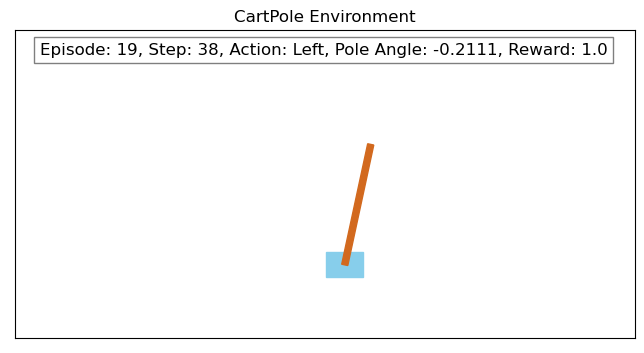

In [29]:
# Create the CartPole environment
env = gym.make('CartPole-v1')

# Initialize variables for plotting the pole angle over time
states = []
times = []

fig, ax = plt.subplots(figsize=(8, 4))

for i_episode in range(20):  # Run for a single episode
    observation = env.reset()  # Reset the environment to start a new episode

    for t in range(100):  # Limit the number of time steps per episode
        action = 1 if observation[2] > 0 else 0  # Choose action based on pole angle
        observation, reward, done, _ = env.step(action)  # Take a step

        # Render the cartpole using matplotlib
        render_cartpole(ax, observation, t, action, reward, i_episode)
        display(plt.gcf())  # Display the current frame
        clear_output(wait=True)  # Clear the output to make room for the next frame

        # Save the figure locally
        filename = f"images/cartpole_episode{i_episode}_step_{t}.png"
        plt.savefig(filename)

        # Save data for plotting pole angle over time
        states.append(observation)
        times.append(t)

        if done:  # Check if the episode is done
            print(f"Episode {i_episode+1} finished after {t+1} timesteps")
            break

env.close()  # Close the environment

Note: The code uses a Q-learning algorithm, a fundamental RL technique. Q-learning is a model-free RL algorithm that learns to estimate the quality (Q-values) of state-action pairs and uses these estimates to make decisions.